In [1]:
import torch
from torchvision import transforms
import pytorch_lightning as pl
from argparse import ArgumentParser
from pytorch_lightning.loggers import WandbLogger
from tqdm import tqdm as tqdm
import gc

from engine_lightning import LitEngineResNet
from lartpcdataset import lartpcDataset, SparseToFull

In [4]:
# Code to empty gpu memory
# torch.cuda.empty_cache()
# del model
# gc.collect()

17

In [2]:
if __name__ == '__main__':
    wandb_logger = WandbLogger(project='lar-e3nn-base')

    pl.seed_everything(42, workers=True)

    DEVICE = torch.device("cuda")
    #DEVICE = torch.device("cpu")

    BATCHSIZE=2

    # data
    data_transform = transforms.Compose([
            SparseToFull()
    ])

    dataset = lartpcDataset( root="../data3d",transform=data_transform)
    train_dataset, valid_dataset = torch.utils.data.random_split(dataset,[450,50])

    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=BATCHSIZE,
        shuffle=True,
        num_workers=8, 
        pin_memory=True)
    val_loader = torch.utils.data.DataLoader(
        dataset=valid_dataset,
        batch_size=BATCHSIZE,
        shuffle=False,
        num_workers=8, 
        pin_memory=True)

Global seed set to 42


In [3]:
# model
model = LitEngineResNet()
model.print_model()
model = model.to(DEVICE)


trainer = pl.Trainer(gpus=2,
                     strategy='dp',
                     precision=16,
                     accumulate_grad_batches=4,
                     #deterministic=True,
                     limit_train_batches=5,
                     logger=wandb_logger, 
                     min_epochs=1,
                     max_epochs=10,
                     log_every_n_steps=1,
                     auto_lr_find="lr")


lr_finder = trainer.tuner.lr_find(model, train_loader, val_loader, num_training = 20, early_stop_threshold=None)

# Results can be found in
lr_finder.results

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

# Pick point based on plot, or get suggestion
new_lr = lr_finder.suggestion()

# update hparams of the model
model.hparams.lr = new_lr

# finds learning rate automatically
# sets hparams.lr or hparams.learning_rate to that learning rate
#trainer.tune(model)

#trainer.fit(model, train_loader, val_loader)


ResNet(
  (conv1): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), padding=(3, 3, 3), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=T

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Global seed set to 42


Restoring states from the checkpoint path at /home/oalterkait/lar-e3nn/lr_find_temp_model_e3499de8-5862-42b3-86b7-c3393a1c097e.ckpt
Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/home/oalterkait/.local/lib/python3.6/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.gradient(loss).argmin()
  File "<__array_function__ internals>", line 6, in gradient
  File "/home/oalterkait/.local/lib/python3.6/site-packages/numpy/lib/function_base.py", line 1053, in gradient
    "Shape of array too small to calculate a numerical gradient, "
ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/home/oalterkait/.local/lib/python3.6/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
   

Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/home/oalterkait/.local/lib/python3.6/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.gradient(loss).argmin()
  File "<__array_function__ internals>", line 6, in gradient
  File "/home/oalterkait/.local/lib/python3.6/site-packages/numpy/lib/function_base.py", line 1053, in gradient
    "Shape of array too small to calculate a numerical gradient, "
ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/home/oalterkait/.local/lib/python3.6/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.gradient(loss).argmin()
  File "<__array_function__ internals>", line 6, in gradient
  File "/home/oalterkait/.local/

None


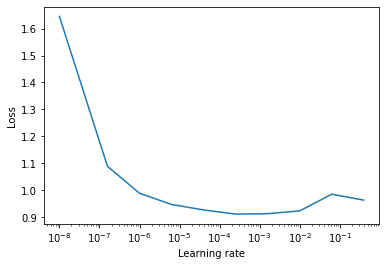

In [5]:
fig = lr_finder.plot(suggest=True)
fig.show()

# Pick point based on plot, or get suggestion
new_lr = lr_finder.suggestion()

print(new_lr)

# update hparams of the model
#model.hparams.lr = new_lr
